# Group 70: Project Proposal
## Predicting Cancer Mortality Rates Through Varying Demographic Data

### Introduction
Cancer is one of the leading causes of death in the developed world. Therefore, it is crucial that we investigate the links between cancer mortality rates and demographic data. Using a dataset imported from data.world that aggregates data from the American Community Survey, clinicaltrails.gov (a public clinical trial database), and the National Cancer Institute, we hope to predict the cancer mortality rate of a county using demographic data. Our question is the following: if given the median age and income of a county in the United States, what will be the cancer mortality rate of that county? Our claim is that a county with a higher median age and lower median income will lead to higher cancer mortality rates. We chose median age and median income as our variables because prior research (cited below) demonstrate a significant relationship between these variables and cancer mortality.



### Methodology

We start our analysis by installing and loading all necessary R packages required for our report.

In [6]:
#Loading libraries

install.packages(c("leaps"))

library(tidyverse) # to perform operations on the data set
library(repr) # to set graph plot size and performing some operations on data set
library(tidymodels)
library(leaps)
library(GGally)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks st

### Reading data from URL
To prepare our data for analysis, we started out with downloading the dataset from the web and publishing the data on our group GitHub. We then pulled the dataset and read it on Jupyter using a URL.

We also set a seed value to ensure that our code is reproducible.

In [7]:
# Reading the training data set from the Web into R
url <- "https://raw.githubusercontent.com/mimilht/dsci100-proj-group70/main/cancer_reg.csv"
cancer <- read_csv(url)
head(cancer)

set.seed(100)

Rows: 3047 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): binnedInc, Geography
dbl (32): avgAnnCount, avgDeathsPerYear, TARGET_deathRate, incidenceRate, me...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,⋯,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1397,469,164.9,489.8,61898,260131,11.2,499.74820,"(61494.5, 125635]",39.3,⋯,NA,41.6,32.9,14.0,81.78053,2.5947283,4.8218571,1.8434785,52.85608,6.118831
173,70,161.3,411.6,48127,43269,18.6,23.11123,"(48021.6, 51046.4]",33.0,⋯,53.8,43.6,31.1,15.3,89.22851,0.9691025,2.2462326,3.7413515,45.37250,4.333096
102,50,174.7,349.7,49348,21026,14.6,47.56016,"(48021.6, 51046.4]",45.0,⋯,43.5,34.9,42.1,21.1,90.92219,0.7396734,0.4658982,2.7473583,54.44487,3.729488
427,202,194.8,430.4,44243,75882,17.1,342.63725,"(42724.4, 45201]",42.8,⋯,40.3,35.0,45.3,25.0,91.74469,0.7826260,1.1613587,1.3626432,51.02151,4.603841
57,26,144.4,350.1,49955,10321,12.5,0.00000,"(48021.6, 51046.4]",48.3,⋯,43.9,35.1,44.0,22.7,94.10402,0.2701920,0.6658304,0.4921355,54.02746,6.796657
428,152,176.0,505.4,52313,61023,15.6,180.25990,"(51046.4, 54545.6]",45.4,⋯,38.8,32.6,43.2,20.2,84.88263,1.6532052,1.5380566,3.3146354,51.22036,4.964476


### Cleaning and Wrangling Data into Tidydata Format

We then remove the missing data from our columns by removing the N/A fields.

The dataset required minimal cleaning as the data was in a relatively tidy format, and there wasn’t any metadata attached in the file nor was there any mismatch of rows and columns.


In [8]:
cancer_data <- cancer |> filter(na.rm = TRUE)
colSums(!is.na(cancer))

cancer_filter <- cancer_data |> select(-PctPrivateCoverageAlone, 
                                       -PctSomeCol18_24, -Geography, -avgAnnCount,
                                      -avgDeathsPerYear, -incidenceRate, -studyPerCap, -binnedInc)
cancer_clean <- na.omit(cancer_filter)
head(cancer_clean)



avgAnnCount        avgDeathsPerYear        TARGET_deathRate 
                   3047                    3047                    3047 
          incidenceRate               medIncome              popEst2015 
                   3047                    3047                    3047 
         povertyPercent             studyPerCap               binnedInc 
                   3047                    3047                    3047 
              MedianAge           MedianAgeMale         MedianAgeFemale 
                   3047                    3047                    3047 
              Geography        AvgHouseholdSize          PercentMarried 
                   3047                    3047                    3047 
           PctNoHS18_24              PctHS18_24         PctSomeCol18_24 
                   3047                    3047                     762 
        PctBachDeg18_24            PctHS25_Over       PctBachDeg25_Over 
                   3047                    3047                    3047 
     PctEmployed16_Over    PctUnemployed16_Over      PctPrivateCoverage 
                   2895                    3047                    3047 
PctPrivateCoverageAlone      PctEmpPrivCoverage       PctPublicCoverage 
                   2438                    3047                    3047 
 PctPublicCoverageAlone                PctWhite                PctBlack 
                   3047                    3047                    3047 
               PctAsian            PctOtherRace    PctMarriedHouseholds 
                   3047                    3047                    3047 
              BirthRate 
                   3047

TARGET_deathRate,medIncome,popEst2015,povertyPercent,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,⋯,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
164.9,61898,260131,11.2,39.3,36.9,41.7,2.54,52.5,11.5,⋯,75.1,41.6,32.9,14.0,81.78053,2.5947283,4.8218571,1.8434785,52.85608,6.118831
161.3,48127,43269,18.6,33.0,32.2,33.7,2.34,44.5,6.1,⋯,70.2,43.6,31.1,15.3,89.22851,0.9691025,2.2462326,3.7413515,45.37250,4.333096
174.7,49348,21026,14.6,45.0,44.0,45.8,2.62,54.2,24.0,⋯,63.7,34.9,42.1,21.1,90.92219,0.7396734,0.4658982,2.7473583,54.44487,3.729488
194.8,44243,75882,17.1,42.8,42.2,43.4,2.52,52.7,20.2,⋯,58.4,35.0,45.3,25.0,91.74469,0.7826260,1.1613587,1.3626432,51.02151,4.603841
144.4,49955,10321,12.5,48.3,47.8,48.9,2.34,57.8,14.9,⋯,61.6,35.1,44.0,22.7,94.10402,0.2701920,0.6658304,0.4921355,54.02746,6.796657
176.0,52313,61023,15.6,45.4,43.5,48.0,2.58,50.4,29.9,⋯,60.0,32.6,43.2,20.2,84.88263,1.6532052,1.5380566,3.3146354,51.22036,4.964476


We then split our data into training and testing segments by performing a 75-25 split. We do this so that we can use the training data to build our regression model and use the testing data to test the accuracy of our model. 

In [21]:
#Performing a 75-25 split on our data
set.seed(100)
cancer_split <- initial_split(data = cancer_clean, prop = 0.75, strata = TARGET_deathRate)
cancer_training <- training(cancer_split) #training data set
cancer_testing <- testing(cancer_split) # testing data set



### Selecting Predictor Variables

We then use the function regsubsets() to help us choose the best predictor variable that has the highest correlation with the mortality rate of cancer patients.

###NOTE: 
talk more about regsubsets and what the function does. 

In [19]:
bestsub.model <- regsubsets(TARGET_deathRate ~ medIncome + 
                              popEst2015 + povertyPercent + 
                              MedianAge + MedianAgeMale + 
                              MedianAgeFemale + AvgHouseholdSize + 
                              PercentMarried + PctNoHS18_24 +
                              PctHS18_24 + PctBachDeg18_24 +
                              PctHS25_Over + PctBachDeg25_Over +
                              PctUnemployed16_Over + PctPrivateCoverage +
                              PctEmpPrivCoverage + PctPublicCoverage +
                              PctPublicCoverageAlone + PctWhite +
                              PctBlack + PctAsian +
                              PctMarriedHouseholds + BirthRate + PctEmployed16_Over +
                              PctOtherRace, 
                            data = cancer_training, nvmax = 10)
#cancer_data <- cancer_data |> 
#    select(medIncome, MedianAge, TARGET_deathRate) |> # selecting only relevant columns
#    filter(na.rm = TRUE) |> # removing observations with N/A values
#    filter(MedianAge <= 100) |> # removing observations with erroneous median age
#    rename(MedianIncome = medIncome,
#           DeathsPerCapita = TARGET_deathRate) # renaming columns to consistent format
#head(cancer_data) # display first 6 rows of data

In [10]:
summary(bestsub.model)

Subset selection object
Call: regsubsets.formula(TARGET_deathRate ~ medIncome + popEst2015 + 
    povertyPercent + MedianAge + MedianAgeMale + MedianAgeFemale + 
    AvgHouseholdSize + PercentMarried + PctNoHS18_24 + PctHS18_24 + 
    PctBachDeg18_24 + PctHS25_Over + PctBachDeg25_Over + PctUnemployed16_Over + 
    PctPrivateCoverage + PctEmpPrivCoverage + PctPublicCoverage + 
    PctPublicCoverageAlone + PctWhite + PctBlack + PctAsian + 
    PctMarriedHouseholds + BirthRate + PctEmployed16_Over + PctOtherRace, 
    data = cancer_training, nvmax = 10)
25 Variables  (and intercept)
                       Forced in Forced out
medIncome                  FALSE      FALSE
popEst2015                 FALSE      FALSE
povertyPercent             FALSE      FALSE
MedianAge                  FALSE      FALSE
MedianAgeMale              FALSE      FALSE
MedianAgeFemale            FALSE      FALSE
AvgHouseholdSize           FALSE      FALSE
PercentMarried             FALSE      FALSE
PctNoHS18_24     

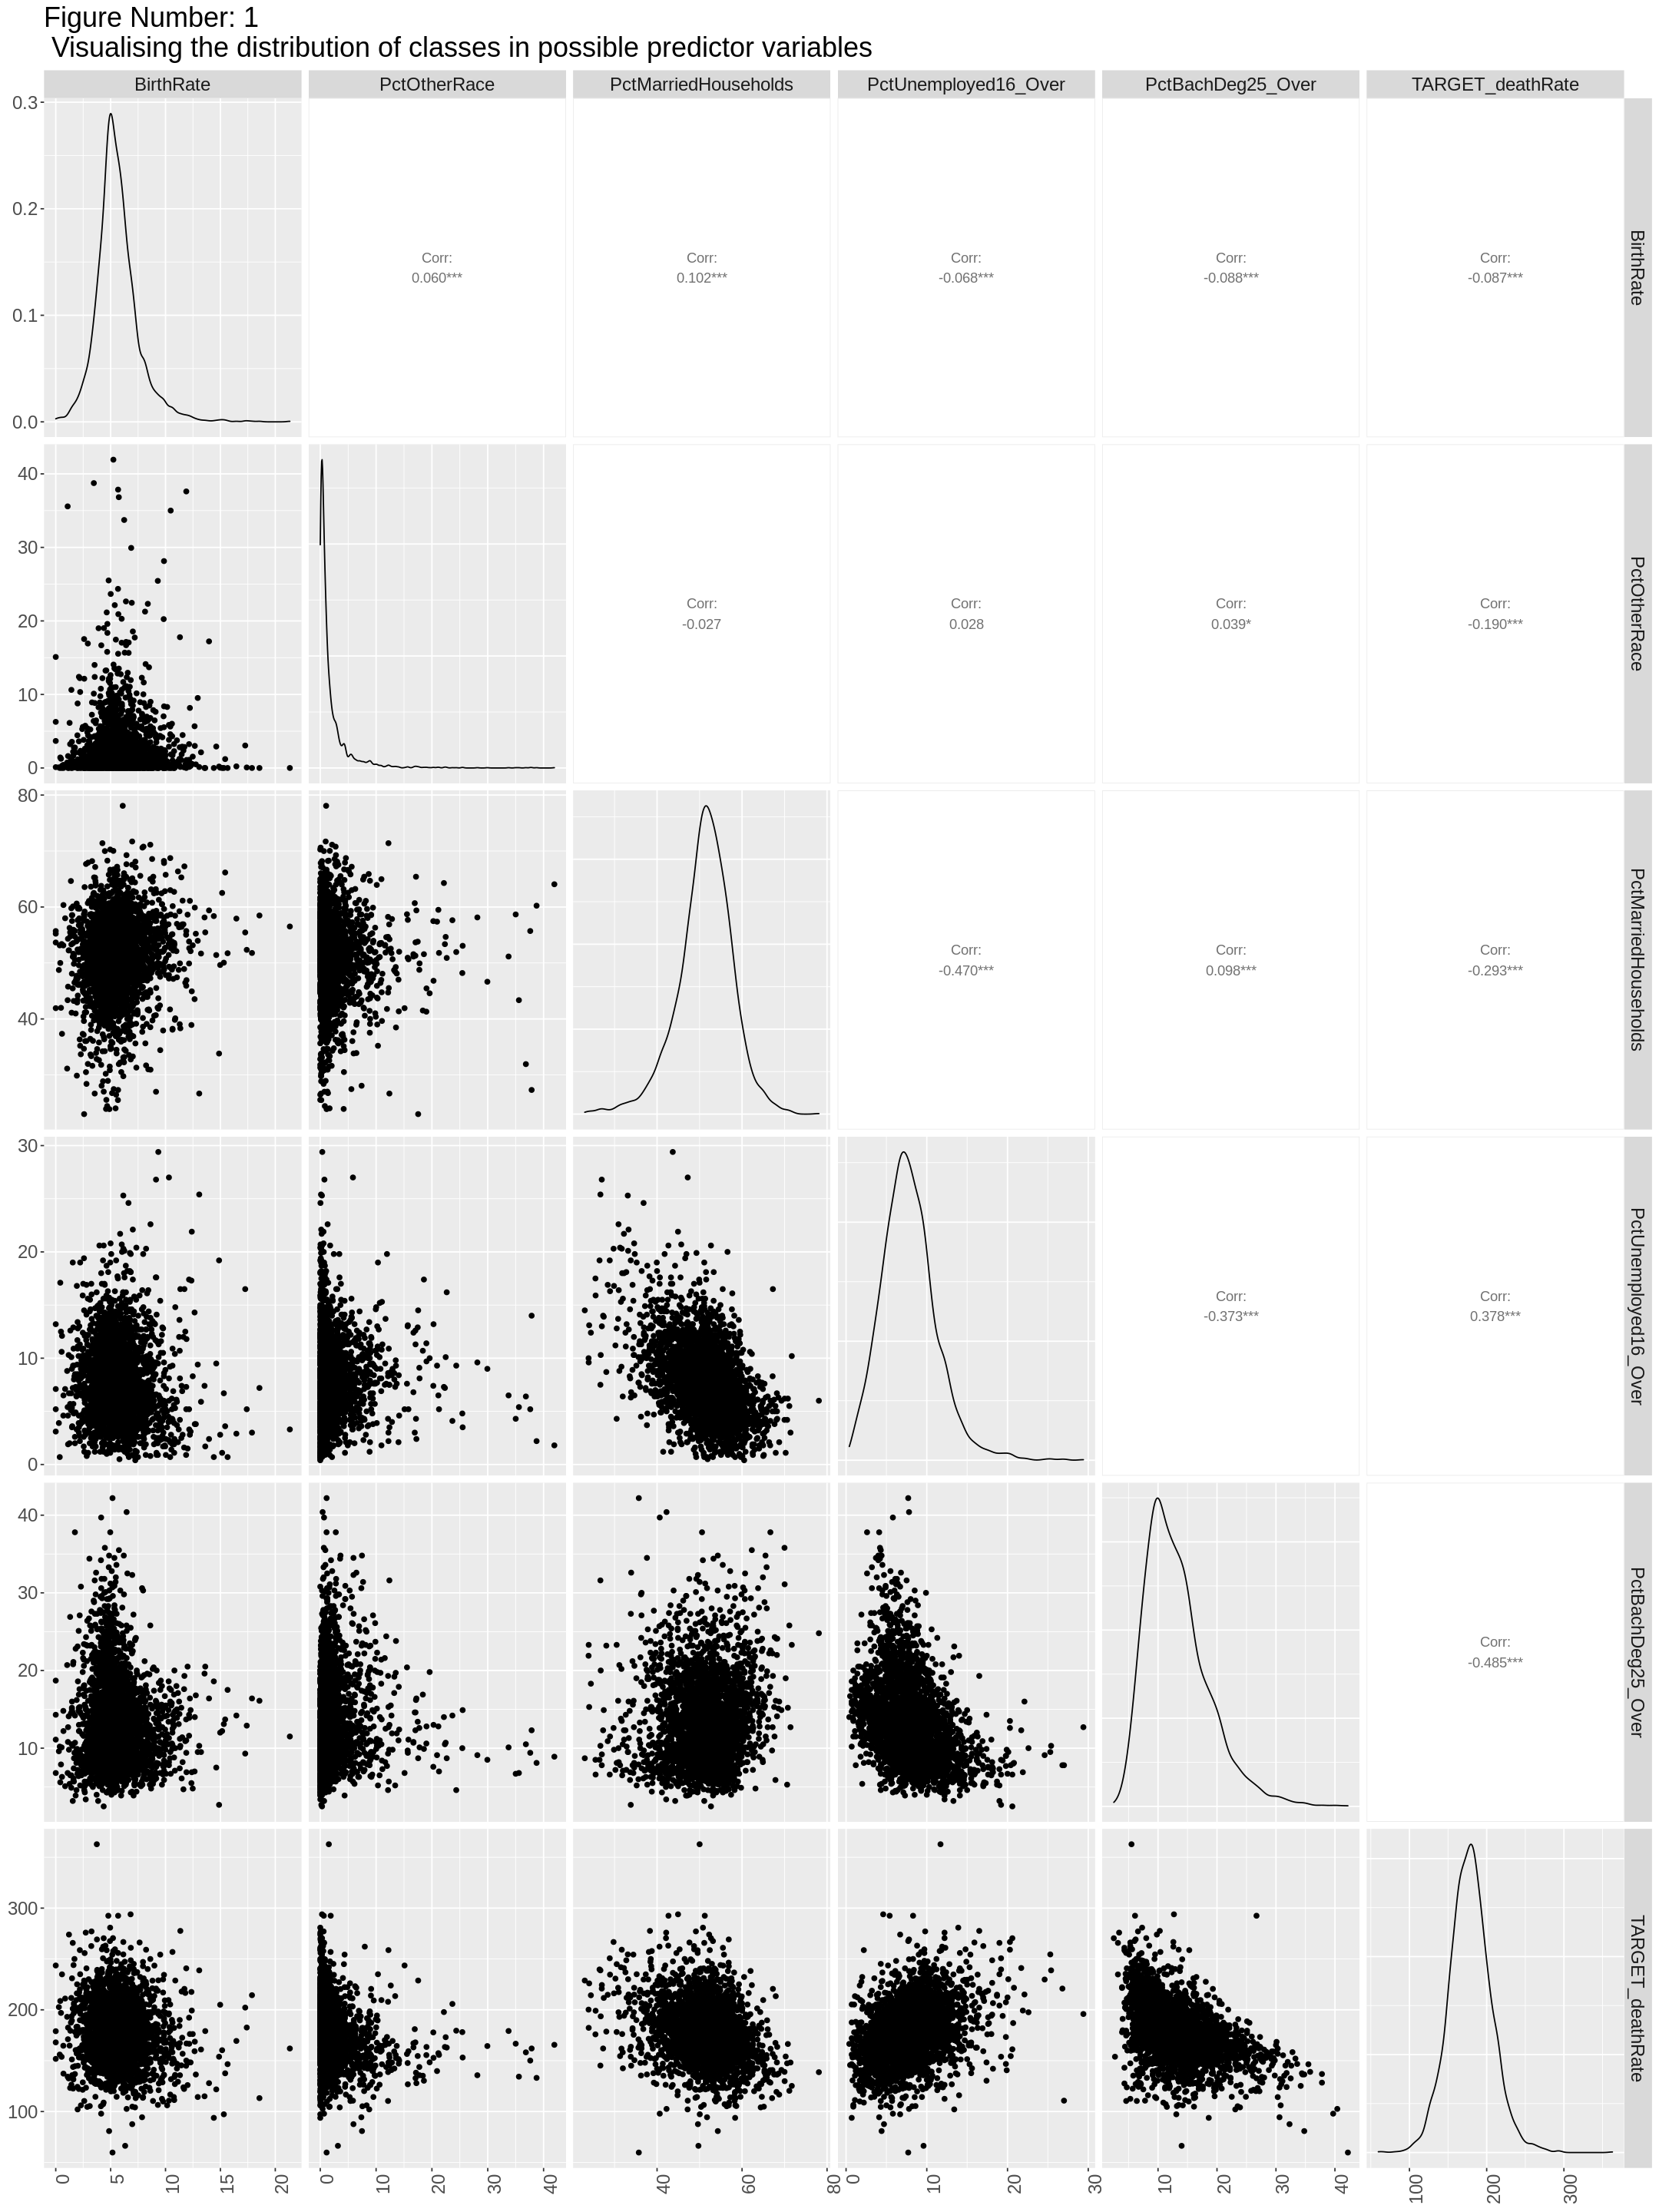

In [11]:
options(repr.plot.width = 18, repr.plot.height = 24)
paired_plot <- cancer_filter |>
               select(BirthRate, PctOtherRace, PctMarriedHouseholds, PctUnemployed16_Over, PctBachDeg25_Over, TARGET_deathRate) |>
               ggpairs() + #colouring the data points by the UNS column (which conatins the classes to be predicted)
               ggtitle("Figure Number: 1 \n Visualising the distribution of classes in possible predictor variables") +
               theme(text = element_text(size = 18)) +
               theme(axis.text.x = element_text(angle = 90, hjust = 1)) # adjusting the x-axis labels so they don't overlap wiht each other and are clearly visible

paired_plot

Looking at the last row of the panel above, we see how different predictors relate to the mortality rate of cancer patients.

###Note: Explain each plot

### KNN Regression Model

We now form our Knn regression model usine the predictors: BirthRate, PctOtherRace, PctMarriedHouseholds, PctUnemployed16_Over and PctBachDeg25_Over.
                   

In [12]:
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_recipe <- recipe(TARGET_deathRate ~ BirthRate + PctOtherRace + PctMarriedHouseholds + PctUnemployed16_Over + PctBachDeg25_Over, 
                   data = cancer_training)

lm_fit <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_spec) |>
  fit(data = cancer_training)

lm_test_results <- lm_fit |>
  predict(cancer_testing) |>
  bind_cols(cancer_testing) |>
  metrics(truth = TARGET_deathRate, estimate = .pred)

lm_test_results

summary_stats <- cancer_clean |>
    select(PctNoHS18_24, PctHS25_Over, PctBachDeg25_Over, PctUnemployed16_Over, PctMarriedHouseholds, TARGET_deathRate) |>
    map_df(sd)
summary_stats

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,23.4660142
rsq,standard,0.2882836
mae,standard,17.1803625


PctNoHS18_24,PctHS25_Over,PctBachDeg25_Over,PctUnemployed16_Over,PctMarriedHouseholds,TARGET_deathRate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.101923,7.017115,5.359881,3.451343,6.522579,27.46499


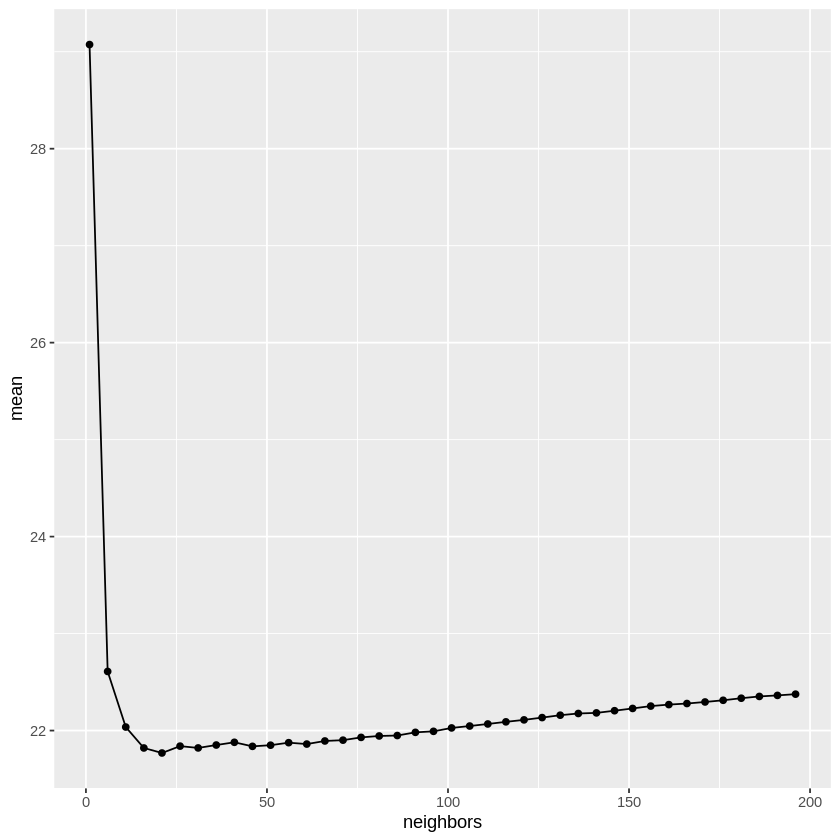

In [13]:
cancer_recipe <- recipe(TARGET_deathRate ~ BirthRate + PctOtherRace + PctMarriedHouseholds
                        + PctUnemployed16_Over + PctBachDeg25_Over, 
                        data = cancer_training) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("regression")

# create a 5-fold cross-validation object
cancer_vfold <- vfold_cv(cancer_training, v = 5, strata = TARGET_deathRate)

gridvals <- tibble(neighbors = seq(from = 1, to = 200, by = 5))

acc <- workflow() |>
    add_recipe(cancer_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = cancer_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

min_mean <- acc |>
    filter(mean == min(mean))

options(repr.plot.width = 7, repr.plot.height = 7)

ggplot(acc, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line()

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,23.12913


`geom_smooth()` using formula 'y ~ x'



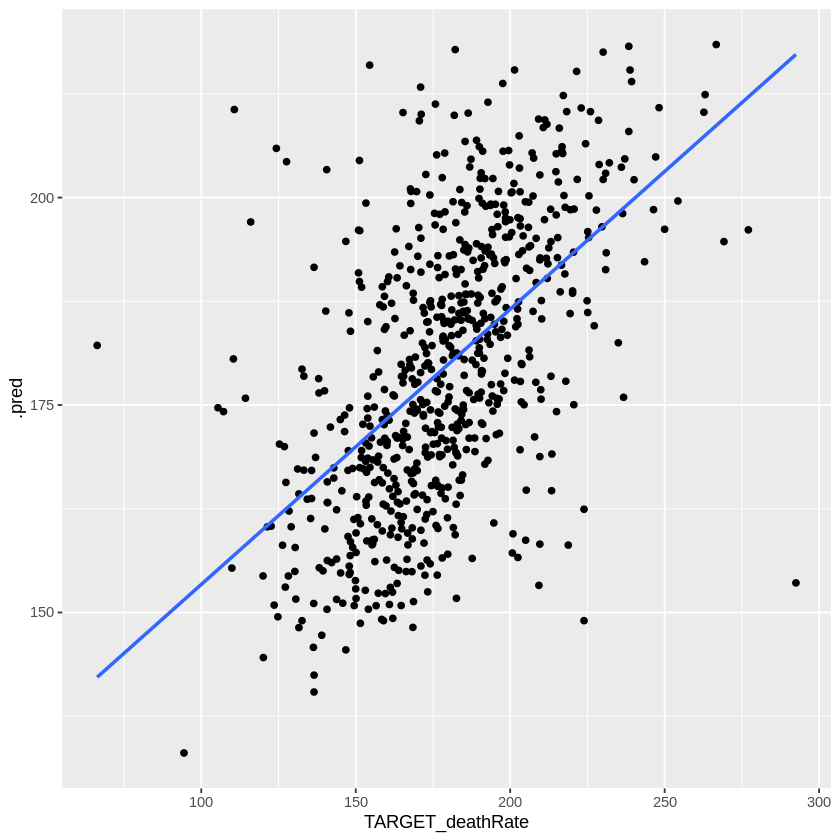

In [14]:
knn_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 16) |>
     set_engine("kknn") |>
     set_mode("regression")

acc <- workflow() |>
    add_recipe(cancer_recipe) |>
    add_model(knn_spec_2) |>
    fit(data = cancer_training)


predictions <- acc |>
    predict(cancer_testing) |>
    bind_cols(cancer_testing)

metrics_cancer <- metrics(predictions, truth = TARGET_deathRate, estimate = .pred) |>
    filter(.metric == "rmse")
metrics_cancer

options(repr.plot.width = 7, repr.plot.height = 7)

ggplot(predictions, aes(x = TARGET_deathRate, y = .pred)) +
    geom_point() +
    geom_smooth(method = lm, se = FALSE)

### Visualizing Data

In [15]:
options(repr.plot.width = 15, repr.plot.height = 8) # adjusts graph size

# cancer_plot_age <- ggplot(cancer_training, aes(x = MedianAge)) +
#     geom_histogram() + # using histogram to show distribution
#     labs(x = "Median Age of US Counties", y = "Frequency") + # label axes
#     ggtitle("Distribution of Median Age of US Counties") + # create graph title
#     theme(text = element_text(size = 20)) # adjust text size
# cancer_plot_income <- ggplot(cancer_training, aes(x = MedianIncome)) +
#     geom_histogram() +
#     labs(x = "Median Income of US Counties", y = "Frequency") +
#     ggtitle("Distribution of Median Income of US Counties (US Dollars)") +
#     theme(text = element_text(size = 20))
# cancer_plot_age
# cancer_plot_income

In [24]:
head(cancer)

avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,⋯,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1397,469,164.9,489.8,61898,260131,11.2,499.74820,"(61494.5, 125635]",39.3,⋯,NA,41.6,32.9,14.0,81.78053,2.5947283,4.8218571,1.8434785,52.85608,6.118831
173,70,161.3,411.6,48127,43269,18.6,23.11123,"(48021.6, 51046.4]",33.0,⋯,53.8,43.6,31.1,15.3,89.22851,0.9691025,2.2462326,3.7413515,45.37250,4.333096
102,50,174.7,349.7,49348,21026,14.6,47.56016,"(48021.6, 51046.4]",45.0,⋯,43.5,34.9,42.1,21.1,90.92219,0.7396734,0.4658982,2.7473583,54.44487,3.729488
427,202,194.8,430.4,44243,75882,17.1,342.63725,"(42724.4, 45201]",42.8,⋯,40.3,35.0,45.3,25.0,91.74469,0.7826260,1.1613587,1.3626432,51.02151,4.603841
57,26,144.4,350.1,49955,10321,12.5,0.00000,"(48021.6, 51046.4]",48.3,⋯,43.9,35.1,44.0,22.7,94.10402,0.2701920,0.6658304,0.4921355,54.02746,6.796657
428,152,176.0,505.4,52313,61023,15.6,180.25990,"(51046.4, 54545.6]",45.4,⋯,38.8,32.6,43.2,20.2,84.88263,1.6532052,1.5380566,3.3146354,51.22036,4.964476


In [22]:
cancer_filter <- cancer |> filter(na.rm = TRUE)
head(cancer_filter)
colSums(!is.na(cancer_filter))

avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,⋯,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1397,469,164.9,489.8,61898,260131,11.2,499.74820,"(61494.5, 125635]",39.3,⋯,NA,41.6,32.9,14.0,81.78053,2.5947283,4.8218571,1.8434785,52.85608,6.118831
173,70,161.3,411.6,48127,43269,18.6,23.11123,"(48021.6, 51046.4]",33.0,⋯,53.8,43.6,31.1,15.3,89.22851,0.9691025,2.2462326,3.7413515,45.37250,4.333096
102,50,174.7,349.7,49348,21026,14.6,47.56016,"(48021.6, 51046.4]",45.0,⋯,43.5,34.9,42.1,21.1,90.92219,0.7396734,0.4658982,2.7473583,54.44487,3.729488
427,202,194.8,430.4,44243,75882,17.1,342.63725,"(42724.4, 45201]",42.8,⋯,40.3,35.0,45.3,25.0,91.74469,0.7826260,1.1613587,1.3626432,51.02151,4.603841
57,26,144.4,350.1,49955,10321,12.5,0.00000,"(48021.6, 51046.4]",48.3,⋯,43.9,35.1,44.0,22.7,94.10402,0.2701920,0.6658304,0.4921355,54.02746,6.796657
428,152,176.0,505.4,52313,61023,15.6,180.25990,"(51046.4, 54545.6]",45.4,⋯,38.8,32.6,43.2,20.2,84.88263,1.6532052,1.5380566,3.3146354,51.22036,4.964476


avgAnnCount        avgDeathsPerYear        TARGET_deathRate 
                   3047                    3047                    3047 
          incidenceRate               medIncome              popEst2015 
                   3047                    3047                    3047 
         povertyPercent             studyPerCap               binnedInc 
                   3047                    3047                    3047 
              MedianAge           MedianAgeMale         MedianAgeFemale 
                   3047                    3047                    3047 
              Geography        AvgHouseholdSize          PercentMarried 
                   3047                    3047                    3047 
           PctNoHS18_24              PctHS18_24         PctSomeCol18_24 
                   3047                    3047                     762 
        PctBachDeg18_24            PctHS25_Over       PctBachDeg25_Over 
                   3047                    3047                    3047 
     PctEmployed16_Over    PctUnemployed16_Over      PctPrivateCoverage 
                   2895                    3047                    3047 
PctPrivateCoverageAlone      PctEmpPrivCoverage       PctPublicCoverage 
                   2438                    3047                    3047 
 PctPublicCoverageAlone                PctWhite                PctBlack 
                   3047                    3047                    3047 
               PctAsian            PctOtherRace    PctMarriedHouseholds 
                   3047                    3047                    3047 
              BirthRate 
                   3047

In [23]:
# get rid PctSomeCol18_24, PctEmployed16_Over, PctPrivateCoverageAlone because they don't have 3047 observations
cancer_filter <- cancer_filter |> select(-PctSomeCol18_24, PctEmployed16_Over,PctPrivateCoverageAlone)
head(cancer_filter)

avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,⋯,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1397,469,164.9,489.8,61898,260131,11.2,499.74820,"(61494.5, 125635]",39.3,⋯,NA,41.6,32.9,14.0,81.78053,2.5947283,4.8218571,1.8434785,52.85608,6.118831
173,70,161.3,411.6,48127,43269,18.6,23.11123,"(48021.6, 51046.4]",33.0,⋯,53.8,43.6,31.1,15.3,89.22851,0.9691025,2.2462326,3.7413515,45.37250,4.333096
102,50,174.7,349.7,49348,21026,14.6,47.56016,"(48021.6, 51046.4]",45.0,⋯,43.5,34.9,42.1,21.1,90.92219,0.7396734,0.4658982,2.7473583,54.44487,3.729488
427,202,194.8,430.4,44243,75882,17.1,342.63725,"(42724.4, 45201]",42.8,⋯,40.3,35.0,45.3,25.0,91.74469,0.7826260,1.1613587,1.3626432,51.02151,4.603841
57,26,144.4,350.1,49955,10321,12.5,0.00000,"(48021.6, 51046.4]",48.3,⋯,43.9,35.1,44.0,22.7,94.10402,0.2701920,0.6658304,0.4921355,54.02746,6.796657
428,152,176.0,505.4,52313,61023,15.6,180.25990,"(51046.4, 54545.6]",45.4,⋯,38.8,32.6,43.2,20.2,84.88263,1.6532052,1.5380566,3.3146354,51.22036,4.964476


### Discussion

We expect to find a positive correlation between the median age of counties and the cancer mortality rate (deaths per capita). We also expect that mortality rate increases with a decrease in median income.

We hope that our findings can affirm a greater need for healthcare access and support in geographic areas with lower-income and elderly populations. The results of this study could lead to other research questions investigating the trends between demographic data and other illnesses, such as heart disease, diabetes, and obesity. Our findings could also help in making decisions about distribution of healthcare infrastructure and facilities according to more vulnerable demographics.

### Conclusion


### Sources cited
1) Siegel, R. L., Miller, K. D., Wagle, N. S., & Jemal, A. (2023). Cancer statistics, 2023. CA: A Cancer Journal for Clinicians, 73(1), 17–48. https://doi.org/10.3322/caac.21763 
2) Vaccarella, S., Georges, D., Bray, F., Ginsburg, O., Charvat, H., Martikainen, P., Brønnum-Hansen, H., Deboosere, P., Bopp, M., Leinsalu, M., Artnik, B., Lorenzoni, V., De Vries, E., Marmot, M., Vineis, P., Mackenbach, J., & Nusselder, W. (2023). Socioeconomic inequalities in cancer mortality between and within countries in Europe: A population-based study. The Lancet Regional Health - Europe, 25, 100551. https://doi.org/10.1016/j.lanepe.2022.100551 